# Final Project: Predicting Players' Income on Madden NFL 24

By Chuhan Tang


The dataset `maddennfl24fullplayerratings.csv` contains 67 columns describing the characteristics of each individual player. There are 2368 players, so 2368 observations. I aim to predict a target variable which is the sum of `total_salary` and `signing_bonus`, which I will call `total_income`. Although the data is from this simulation game, the game is, at least partially, based on real-life facts. While not necessarily always accurate, the data should reflect the general patterns. This project aims to inform a general audience of what are the correlates of football players' total income. 

The dataset can be accessed at: https://www.kaggle.com/datasets/dtrade84/madden-24-player-ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
sns.set(style="white")

df = pd.read_csv('/Users/13689530159/Desktop/USFCA/Semester 6/ECON 621/maddennfl24fullplayerratings.csv')
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

df['total_income'] = df['total_salary'] + df['signing_bonus']
# I dropped 'total_salary', 'signing_bonus', and 'birthdate', since the information of all these three columns have been contained in 'total_income' and 'age' respectively.
# I also dropped 'full_name' and 'jersey_number', since they are not going to have an effect on our the total income - the former is irrelevant (the reputation of a name comes from the other attributes and not the name itself)
# and the latter is random.
# We will thus be teft with 63 columns.
df.drop(['total_salary', 'signing_bonus', 'birthdate', 'full_name', 'jersey_number'], axis=1, inplace=True)
df.head()

,team,position,overall_rating,speed,acceleration,strength,agility,awareness,catching,carrying,...,throw_accuracy_deep,play_action,throw_on_the_run,height,weight,age,years_pro,running_style,player_handness,total_income
0,Broncos,DT,64,74,74,78,76,67,24,30,...,6,6,6,76,294,25,1,Long Stride Awkward,Right,750000
1,Buccaneers,MLB,63,87,91,68,82,60,56,61,...,6,6,6,72,230,26,4,Default Stride Loose,Right,1080000
2,49ers,TE,65,80,84,73,74,69,76,69,...,5,5,10,77,244,23,0,Long Stride Default,Right,5280000
3,Bears,FS,85,91,89,63,85,90,77,74,...,6,6,6,72,206,29,6,Default Stride High and Tight,Right,59120000
4,Bears,MLB,63,83,88,74,83,66,63,61,...,6,6,6,77,262,25,3,Long Stride Loose,Right,1010000


- `team`: The team the player is currently assigned to.
- `position`: The player's position on the field (e.g., QB, WR, RB).
- `overall_rating`: The player's overall rating in the game.
- `speed`: The player's speed rating.
- `acceleration`: The player's acceleration rating.
- `strength`: The player's strength rating.
- `agility`: The player's agility rating.
- `awareness`: The player's awareness rating.
- `catching`: The player's catching ability rating.
- `carrying`: The player's ability to carry the ball rating.
- `throw_power`: The player's arm strength for throwing the ball.
- `kick_power`: The player's ability to kick the ball.
- `kick_accuracy`: The player's accuracy when kicking the ball.
- `run_block`: The player's ability to block during running plays.
- `pass_block`: The player's ability to block during passing plays.
- `tackle`: The player's tackling ability.
- `break_tackle`: The player's ability to break tackles.
- `jumping`: The player's jumping ability.
- `kick_return`: The player's ability to return kicks.
- `injury`: The player's injury rating or vulnerability.
- `stamina`: The player's stamina rating for endurance.
- `toughness`: The player's toughness rating, affecting their resilience.
- `trucking`: The player's ability to run over opponents.
- `change_of_direction`: The player's ability to quickly change direction.
- `ball_carrier_vision`: The player's vision while carrying the ball.
- `stiff_arm`: The player's ability to stiff-arm defenders.
- `spin_move`: The player's ability to spin past defenders.
- `juke_move`: The player's ability to make quick direction changes to avoid tackles.
- `impact_blocking`: The player's ability to block with force.
- `run_block_power`: The player's strength in blocking for running plays.
- `run_block_finesse`: The player's finesse in blocking for running plays.
- `pass_block_power`: The player's strength in blocking for passing plays.
- `pass_block_finesse`: The player's finesse in blocking for passing plays.
- `lead_block`: The player's ability to block and lead a play.
- `break_sack`: The player's ability to avoid being sacked.
- `throw_under_pressure`: The player's ability to throw accurately under pressure.
- `power_moves`: The player's ability to perform power moves when rushing the quarterback.
- `finesse_moves`: The player's ability to perform finesse moves when rushing the quarterback.
- `block_shedding`: The player's ability to shed blockers when rushing.
- `pursuit`: The player's pursuit ability when chasing the ball carrier.
- `play_recognition`: The player's ability to recognize plays and react accordingly.
- `man_coverage`: The player's ability to cover an opponent in man-to-man coverage.
- `zone_coverage`: The player's ability to cover an area in zone coverage.
- `spectacular_catch`: The player's ability to make spectacular catches.
- `catch_in_traffic`: The player's ability to catch the ball in traffic.
- `short_route_running`: The player's proficiency in running short routes.
- `medium_route_running`: The player's proficiency in running medium routes.
- `deep_route_running`: The player's proficiency in running deep routes.
- `hit_power`: The player's ability to deliver a powerful hit.
- `press`: The player's ability to press coverage against receivers.
- `release`: The player's ability to release off the line of scrimmage.
- `throw_accuracy_short`: The player's accuracy on short throws (under 20 yards).
- `throw_accuracy_mid`: The player's accuracy on medium throws (20-40 yards).
- `throw_accuracy_deep`: The player's accuracy on deep throws (over 40 yards).
- `play_action`: The player's ability to fake plays effectively.
- `throw_on_the_run`: The player's ability to throw while on the run.
- `height`: The player's height.
- `weight`: The player's weight.
- `age`: The player's age.
- `years_pro`: The number of years the player has been in the NFL.
- `running_style`: The player's running style.
- `player_handness`: The player's handness (left-handed or right-handed).
- `total_income`: The total income of the player, including salary and bonuses.

# 1. Exploratory Data Analysis

## 1.1 Visualizing the Feature Distributions

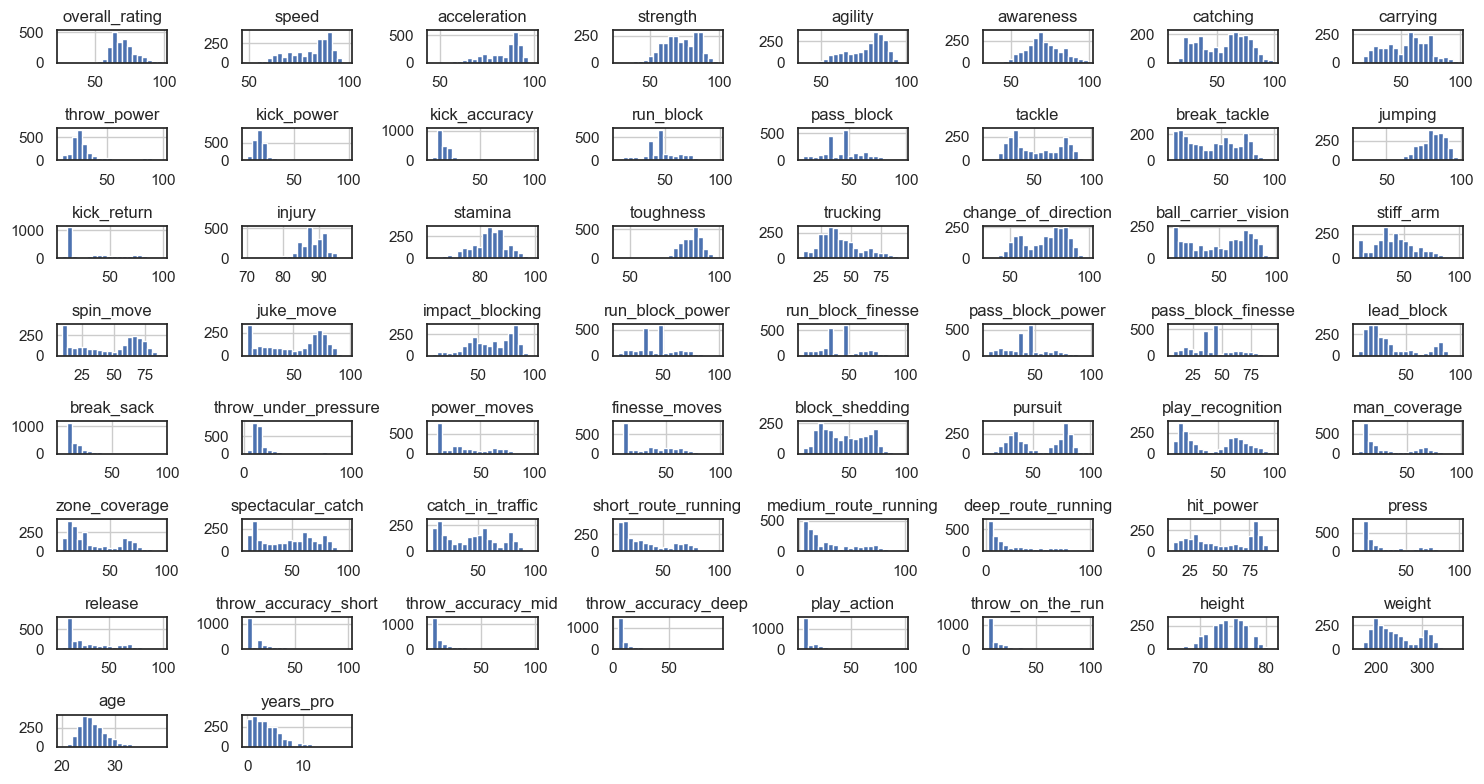

In [2]:
df_features = df.drop('total_income', axis =1)

df_features.hist(bins = 20, figsize= (15,8))
plt.tight_layout()
plt.show()

Note:
1. The distribution of `kick_return`, `throw_accuracy_short`, `throw_accuracy_mid`, `throw_accuracy_deep`, `play_action`, and `throw_on_the_run` is heavily skewed toward 0. This suggests that many players have low or no proficiency in these attributes, reflecting position-based specialization.
2. Features like `catching`, `pursuit`, and `play_recognition` exhibit bimodal distributions, with peaks near both ends. This suggests clear distinctions between player roles (e.g., offensive vs. defensive players).
3. Some attributes, such as `throw_power` and `trucking`, show right-skewed distributions, where most players have moderate values while a smaller number have exceptionally high ratings. Scaling sees to be very helpful in these cases.
4. Variables like `awareness` and `strength` appear approximately normally distributed.
5. The `overall_rating` feature aggregates multiple performance metrics and follows a relatively smooth distribution. Care should be taken to this measure regarding multicollinearity and redundancy, as it is primarily based on the other features.

## 1.2 Descriptive Statistics

In [3]:
def des_summary(df):
    numeric_columns = df_features.select_dtypes(include=['float', 'int64']).columns
    return pd.DataFrame({
        'Mean': df[numeric_columns].mean().round(2),
        'Std': df[numeric_columns].std().round(2),
        'Median': df[numeric_columns].median(),
        'Minimum': df[numeric_columns].min(),
        'Maximum': df[numeric_columns].max(),
        'Missing Values': df[numeric_columns].isna().sum(),
        'Zero Values': (df[numeric_columns] == 0).sum(),
        'Proportion Zero Values': ((df[numeric_columns] == 0).sum() / len(df)).round(2),
        'Unique Values': df[numeric_columns].nunique()
    })

des_summary(df_features)

,Mean,Std,Median,Minimum,Maximum,Missing Values,Zero Values,Proportion Zero Values,Unique Values
overall_rating,70.02,9.59,69.0,26,99,0,0,0.00,65
speed,80.55,10.23,84.0,49,99,0,0,0.00,51
acceleration,83.25,9.77,87.0,46,99,0,0,0.00,51
strength,71.74,12.23,72.0,27,99,0,0,0.00,66
agility,76.40,11.36,80.0,39,98,0,0,0.00,59
awareness,70.40,11.17,70.0,35,99,0,0,0.00,62
catching,55.30,20.69,60.0,12,99,0,0,0.00,85
carrying,54.83,18.14,58.0,14,98,0,0,0.00,81
throw_power,30.33,15.89,26.0,10,99,0,0,0.00,86
kick_power,22.22,15.24,19.0,7,99,0,0,0.00,77


Interestingly, the unique values for each feature is quite low, given that we have about 2400 observations. This suggests that the characteristics of all these player characters are quite similar, if we were to look from a more macro perspective. This implies that there is like an unspoken norm for NFL players: only certain types of sports-people are selected as professionals.

Another interesting thing is the large proportion of 0s in years_pro, meaning that this significant portion of players just got into the industry; along with the small amount of unique values (18) for years_pro, this could imply that there are rapid roster changes in NFL as teams cycle in younger, more physically capable players to replace aging veterans. As we can see, the age span is from 20 year-old to 39 year-old, and from the previous visualization, the majority is located between 20 to 30 year-old.

# 2. Preprocessing

## 2.1 Missing Values

In [4]:
# Check whether there is missing value in any feature

df.isna().any().any()

# We can see that there is no missing value in our dataset.

np.False_

## 2.2 De-skewing the continuous variables

In [7]:
# Let's observe the skewness of the continuous features
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)

overall_rating         -0.255644
speed                  -0.690311
acceleration           -0.991920
strength               -0.273415
agility                -0.691947
awareness               0.203454
catching               -0.150369
carrying               -0.109584
throw_power             2.275581
kick_power              3.701211
kick_accuracy           3.595145
run_block               0.338972
pass_block              0.314701
tackle                  0.183675
break_tackle            0.075814
jumping                -0.889422
kick_return             0.715193
injury                 -0.630450
stamina                -0.397576
toughness              -0.975282
trucking                0.666621
change_of_direction    -0.346096
ball_carrier_vision    -0.246235
stiff_arm               0.286816
spin_move              -0.227073
juke_move              -0.326213
impact_blocking        -0.506235
run_block_power         0.465136
run_block_finesse       0.512080
pass_block_power        0.455955
pass_block

As we can see, most of them aren't super skewed, with most absolute values of skewness less than 1, so we are in good shape. However, there are some columns that have high skewness, and we will unskew them using boxcox. I did not transform the target variable as it is not necessary for this project.

In [16]:
continuous_columns = df.drop('total_income', axis = 1).select_dtypes(include=['float64', 'int64'])

skewed_columns = [col for col in continuous_columns if abs(df[col].skew()) > 1]

unskewed_df = df.copy()

for col in skewed_columns:
    try:
        
        min_value = df[col].min()
        shift = 0

        if min_value <= 0:
            shift = abs(min_value) + 0.1
        
        transformed_data, _ = boxcox(df[col] + shift)
        
        unskewed_df[col] = transformed_data
    except Exception as e:
        print(f"Skipping {col} due to error: {e}")

After we transformed our dataset by doing negative/zero checking and applying boxcox to those highly skewed columns, our columns should be non-skewed. Let's see check it.

This high skewness can negatively impact model performance, especially in the later k-fold cross-validation, where imbalanced training samples may lead to poor generalization. Note that we kept the distribution of the target unchanged.

In [17]:
# Checking skewness

new_skewness = unskewed_df.select_dtypes(include=['float64', 'int64']).skew()
print(new_skewness)

overall_rating         -0.255644
speed                  -0.690311
acceleration           -0.991920
strength               -0.273415
agility                -0.691947
awareness               0.203454
catching               -0.150369
carrying               -0.109584
throw_power            -0.058648
kick_power             -0.123375
kick_accuracy          -0.046067
run_block               0.338972
pass_block              0.314701
tackle                  0.183675
break_tackle            0.075814
jumping                -0.889422
kick_return             0.715193
injury                 -0.630450
stamina                -0.397576
toughness              -0.975282
trucking                0.666621
change_of_direction    -0.346096
ball_carrier_vision    -0.246235
stiff_arm               0.286816
spin_move              -0.227073
juke_move              -0.326213
impact_blocking        -0.506235
run_block_power         0.465136
run_block_finesse       0.512080
pass_block_power        0.455955
pass_block

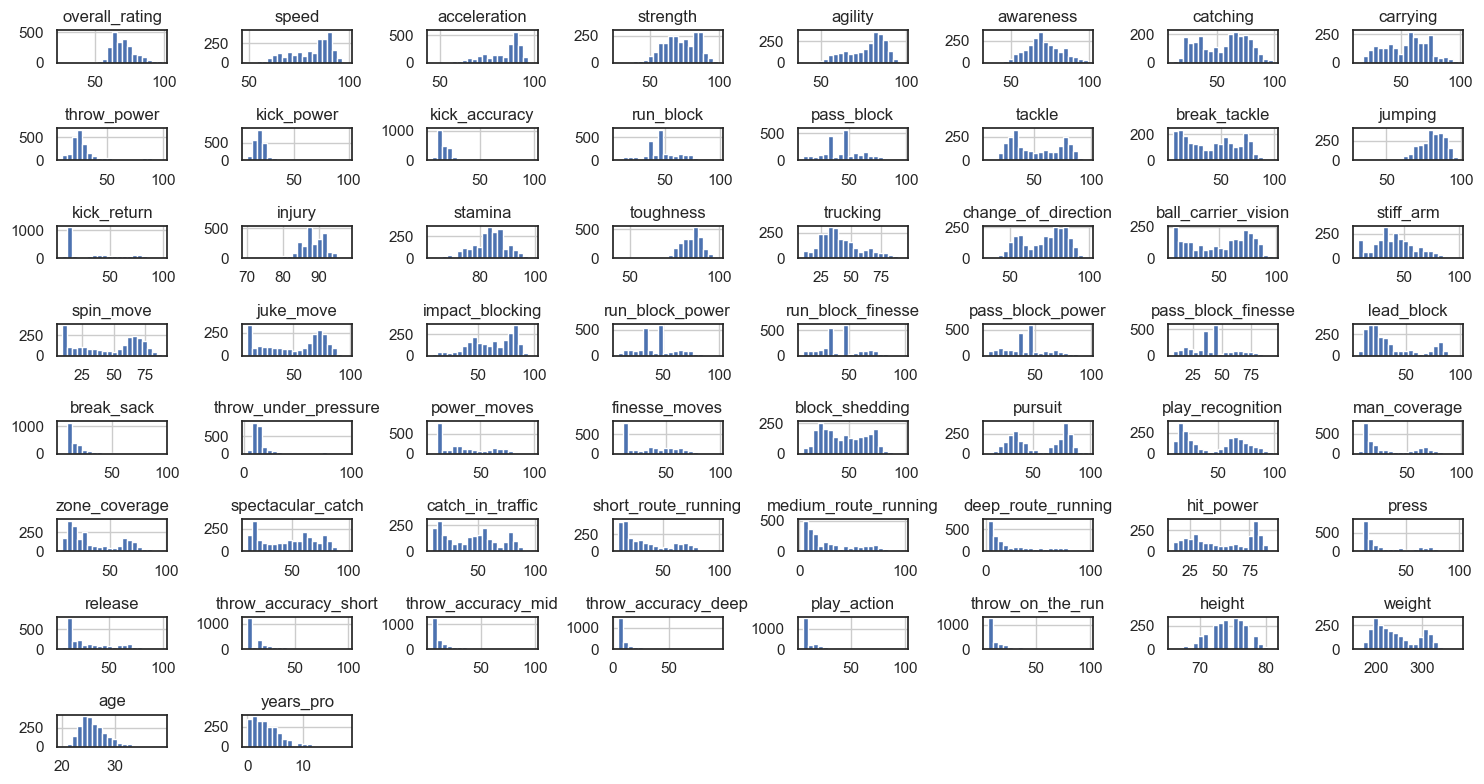

In [124]:
# Let's visualize the unskewed features

unskewed_df_features = df.drop('total_income', axis =1)

unskewed_df_features.hist(bins = 20, figsize= (15,8))
plt.tight_layout()
plt.show()

## 2.3 Scaling the unskewed features 

In [18]:
unskewed_continuous_columns = unskewed_df.drop('total_income', axis=1).select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

prep_df = unskewed_df

prep_df[unskewed_continuous_columns] = scaler.fit_transform(prep_df[unskewed_continuous_columns])

Here, we do not include the target variable. This is because scaling it does not really help with model performance.

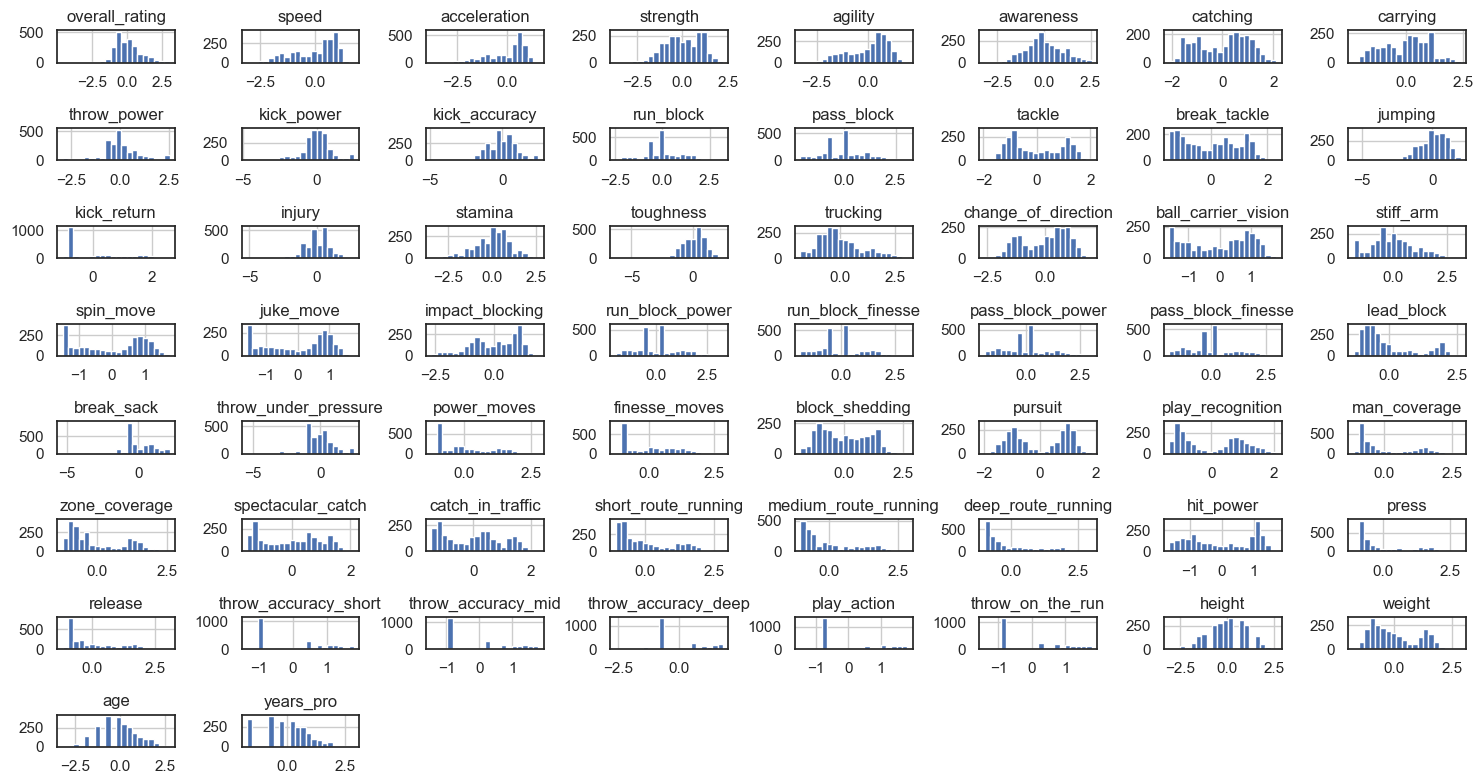

In [126]:
# Let's visualize our prepared continuous predictor

prep_df_features = prep_df.drop('total_income', axis =1)

prep_df_features.hist(bins = 20, figsize= (15,8))
plt.tight_layout()
plt.show()

## 2.4 Converting Variable into Binary

In [19]:
# In our dataset, there is a "handedness" variable, implying whether the player is left-handed or right-handed.
# I will convert it into a binary variable, with 0 implying left-handed and 1 as right-handed.

prep_df['player_handness'] = prep_df['player_handness'].map({'Left': 0, 'Right': 1})

## 2.5 Converting categorical variables into dummies

In [20]:
# There are three categorical variables: team, position, and running_style. I will create dummies for each. We will also not create dummies for all categories as that runs into multicollinearity

prep_df = pd.concat([prep_df, pd.get_dummies(prep_df['team'], drop_first= True, prefix = 'team', prefix_sep = '_')], axis=1)
prep_df = pd.concat([prep_df, pd.get_dummies(prep_df['position'], drop_first= True, prefix = 'position', prefix_sep = '_')], axis=1)
prep_df = pd.concat([prep_df, pd.get_dummies(prep_df['running_style'], drop_first= True, prefix = 'running_style', prefix_sep = '_')], axis=1)

prep_df.head()

,team,position,overall_rating,speed,acceleration,strength,agility,awareness,catching,carrying,...,running_style_Long Stride Awkward,running_style_Long Stride Bread Loaf,running_style_Long Stride Default,running_style_Long Stride High and Tight,running_style_Long Stride Loose,running_style_Short Stride Awkward,running_style_Short Stride Bread Loaf,running_style_Short Stride Default,running_style_Short Stride High and Tight,running_style_Short Stride Loose
0,Broncos,DT,-0.627446,-0.640749,-0.946473,0.512067,-0.035196,-0.304713,-1.513456,-1.368812,...,True,False,False,False,False,False,False,False,False,False
1,Buccaneers,MLB,-0.731719,0.630589,0.793626,-0.306024,0.492855,-0.931377,0.033730,0.340120,...,False,False,False,False,False,False,False,False,False,False
2,49ers,TE,-0.523172,-0.053977,0.077115,0.103021,-0.211213,-0.125666,1.000722,0.781134,...,False,False,True,False,False,False,False,False,False,False
3,Bears,FS,1.562296,1.021770,0.588909,-0.715070,0.756880,1.754328,1.049071,1.056768,...,False,False,False,False,False,False,False,False,False,False
4,Bears,MLB,-0.731719,0.239408,0.486550,0.184831,0.580863,-0.394236,0.372177,0.340120,...,False,False,False,False,True,False,False,False,False,False


# 3. Feature engineering
## 3.1 Identifying High Correlations in features

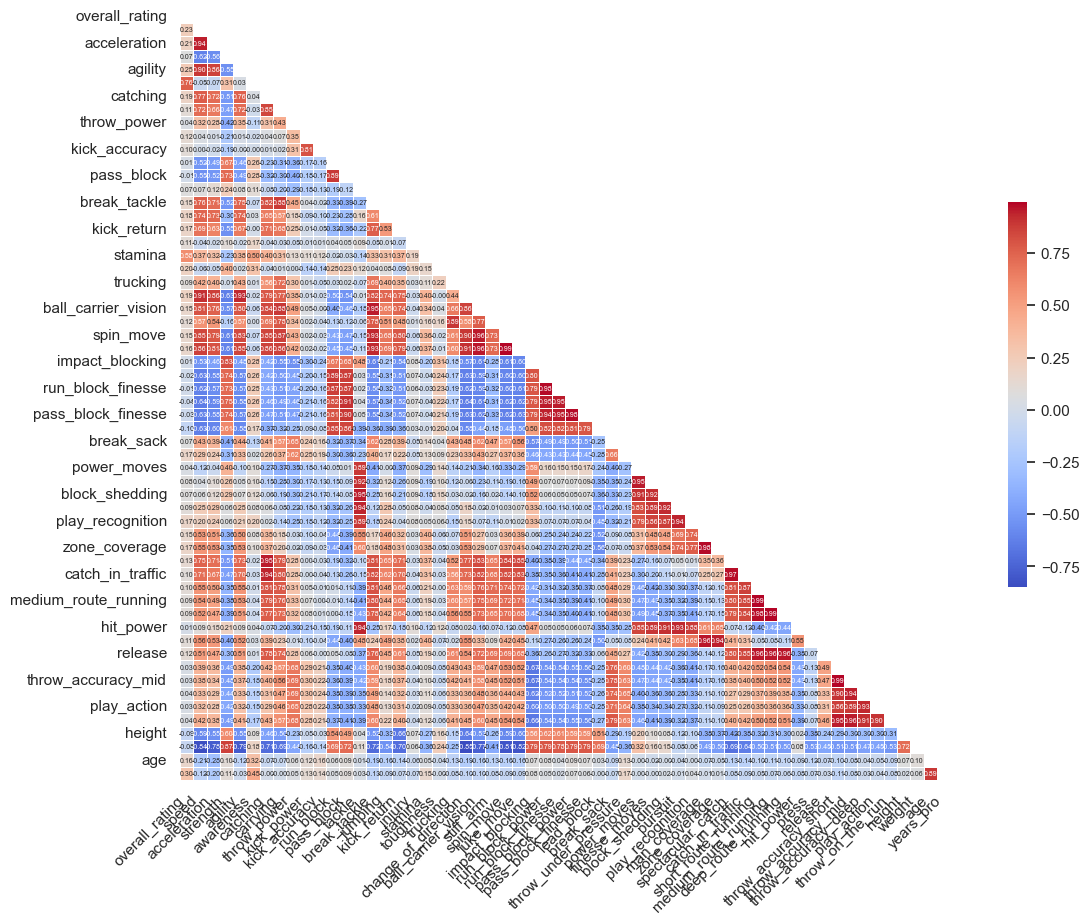

In [21]:

corr_mat = prep_df[unskewed_continuous_columns].corr()

plt.figure(figsize=(15, 10))
plt.tight_layout()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={'size': 5}, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right')
plt.show()

As we see in the heat map, there are many high correlations, so it is in the model's best interest to get rid of some columns whose information is already covered. However, to make sure the requirement is met, such that we are not removing any important information by removing a feature, we will make sure that for each column in a pair of highly correlated columns, we will compare it with all other columns; we will remove the one that has the higher average correlation with all other variables since its information is probably contained in other variables already.

In [22]:
# Let's write a function that does the above.

def remove_predictors(dataframe, threshold):    
    
    data_reduced=dataframe.copy()
    
    while True:
        # Calculate the correlation matrix of the predictors
        corr_mat = data_reduced.corr()
        # Get the absolute pairwise correlations
        corr_mat = np.abs(corr_mat)
        np.fill_diagonal(corr_mat.values, 0)
        corr_mat=corr_mat.fillna(0)
        
        if corr_mat.max().max()<threshold:
            break
        

        # Determine the two predictors associated with the largest absolute pairwise correlation
        max_corr = np.unravel_index(np.argmax(corr_mat), corr_mat.shape)
        predictor_A = max_corr[0]
        predictor_B = max_corr[1]
        
        # Determine the average absolute correlation between A and the other variables
        avg_corr_A = np.mean(corr_mat.iloc[predictor_A, :])
        avg_corr_B = np.mean(corr_mat.iloc[predictor_B, :])
        
        # If A has a larger average correlation, remove it; otherwise, remove predictor B
        if avg_corr_A > avg_corr_B:
            remove_predictor = predictor_A
        else:
            remove_predictor = predictor_B
        
        # Remove the predictor
        
        print('Removed: '+str(data_reduced.columns.tolist()[remove_predictor]))
        
        del data_reduced[data_reduced.columns.tolist()[remove_predictor]]
    
    return data_reduced

In [23]:
# We will then use the threshold of 0.75

removed = remove_predictors(prep_df[unskewed_continuous_columns], 0.75)
other_columns = prep_df.drop(columns=unskewed_continuous_columns)
final_df = pd.concat([removed, other_columns], axis=1)


print(f'shape of the dataframe of continous variables after removing high-pairwise-correlation variables: {removed.shape}')
print(f'shape of the final dataframe: {final_df.shape}')
final_df


Removed: medium_route_running
Removed: spin_move
Removed: throw_accuracy_short
Removed: pass_block_finesse
Removed: zone_coverage
Removed: run_block_power
Removed: deep_route_running
Removed: spectacular_catch
Removed: man_coverage
Removed: short_route_running
Removed: ball_carrier_vision
Removed: throw_on_the_run
Removed: tackle
Removed: pass_block_power
Removed: power_moves
Removed: throw_accuracy_mid
Removed: speed
Removed: catching
Removed: play_recognition
Removed: change_of_direction
Removed: throw_accuracy_deep
Removed: juke_move
Removed: hit_power
Removed: block_shedding
Removed: finesse_moves
Removed: stiff_arm
Removed: pass_block
Removed: age
Removed: break_tackle
Removed: run_block_finesse
Removed: weight
Removed: agility
Removed: run_block
Removed: catch_in_traffic
Removed: impact_blocking
Removed: kick_power
Removed: overall_rating
shape of the dataframe of continous variables after removing high-pairwise-correlation variables: (2368, 21)
shape of the final dataframe: (236

,acceleration,strength,awareness,carrying,throw_power,kick_accuracy,jumping,kick_return,injury,stamina,...,running_style_Long Stride Awkward,running_style_Long Stride Bread Loaf,running_style_Long Stride Default,running_style_Long Stride High and Tight,running_style_Long Stride Loose,running_style_Short Stride Awkward,running_style_Short Stride Bread Loaf,running_style_Short Stride Default,running_style_Short Stride High and Tight,running_style_Short Stride Loose
0,-0.946473,0.512067,-0.304713,-1.368812,-0.485491,0.706167,-0.602608,-0.840974,-0.076277,-1.574079,...,True,False,False,False,False,False,False,False,False,False
1,0.793626,-0.306024,-0.931377,0.340120,-0.367718,-0.982138,1.437386,-0.840974,0.774386,-0.399349,...,False,False,False,False,False,False,False,False,False,False
2,0.077115,0.103021,-0.125666,0.781134,-0.152331,-1.768556,-0.149276,-0.840974,0.490831,0.271926,...,False,False,True,False,False,False,False,False,False,False
3,0.588909,-0.715070,1.754328,1.056768,-0.610989,0.468890,0.417389,1.975209,-1.210494,1.111019,...,False,False,False,False,False,False,False,False,False,False
4,0.486550,0.184831,-0.394236,0.340120,-0.610989,-0.419905,0.757388,-0.840974,-1.777602,-1.406260,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,0.895985,-0.878688,-0.125666,0.119612,-0.256889,-0.419905,1.550719,0.200628,0.774386,0.775381,...,False,False,False,False,False,False,False,False,False,False
2364,0.588909,-0.224215,1.396234,0.395246,0.129214,-0.419905,0.870721,0.316361,0.207277,1.782293,...,False,False,False,False,False,False,False,False,False,False
2365,0.281832,0.184831,-0.662807,1.056768,-0.152331,-0.419905,0.417389,-0.840974,-0.643385,-0.567167,...,False,False,True,False,False,False,False,False,False,False
2366,0.384191,0.921112,-0.752330,-0.817544,-0.152331,-0.419905,0.417389,-0.840974,-1.210494,-1.909716,...,False,False,False,False,True,False,False,False,False,False


We removed continuos variables whose information is already well contained in the remaining, unremoved variables. For example, stamina and acceleration may already determine whether one is good at short and medium route-running. Moreover, overall rating is removed, which makes sense as it is almost entirely based on other attributes.

# 4. Model Building

Let's visualize our target variable. It is very right-skewed but we do not need to unskew it.

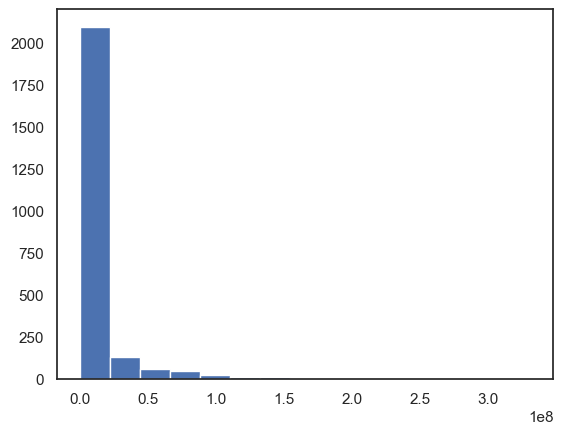

In [24]:
plt.hist(final_df['total_income'], bins = 15)
plt.show()

Interestingly, after skewing, the distribution of our target variable does not look normal. There are two obvious peaks at around 3.75 and 3.79. This bimodal distribution suggests the presence of two distinct groups within the data. One possible explanation is that these peaks represent two different sets of players with different salary structures, such as players with low and high salaries, or possibly players from different teams or positions.

Let's check different possible sub groups based on the catagorical variables.

In [146]:
# Check correlation with other variables to see if subgroups are present
final_df.groupby('running_style')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
running_style,,,,,,,,
Default,338.0,3.785365,0.023440,3.746696,3.764337,3.787597,3.800042,3.839078
Default Stride Awkward,463.0,3.783901,0.023639,3.746696,3.757438,3.786689,3.800047,3.833008
Default Stride Bread Loaf,7.0,3.779420,0.017401,3.755331,3.767575,3.786793,3.788744,3.801180
Default Stride High and Tight,62.0,3.783398,0.021132,3.746696,3.771844,3.786585,3.790081,3.834184
Default Stride Loose,540.0,3.781591,0.022526,3.745033,3.757438,3.785725,3.794524,3.836422
Long Stride Awkward,157.0,3.782896,0.020741,3.745033,3.768491,3.787200,3.792284,3.829853
Long Stride Bread Loaf,4.0,3.784523,0.028051,3.753308,3.769269,3.782418,3.797672,3.819946
Long Stride Default,215.0,3.787185,0.022225,3.746696,3.772808,3.789180,3.800857,3.833594
Long Stride High and Tight,36.0,3.790854,0.022439,3.753308,3.779620,3.788118,3.808731,3.828920


In [147]:
final_df.groupby('team')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
49ers,74.0,3.785591,0.023504,3.746696,3.766694,3.787200,3.794074,3.833008
Bears,74.0,3.782847,0.021892,3.746696,3.757438,3.786741,3.796160,3.827415
Bengals,74.0,3.783642,0.025440,3.746696,3.757438,3.786996,3.805283,3.826618
Bills,74.0,3.786932,0.023767,3.753609,3.769905,3.786740,3.805662,3.837556
Broncos,74.0,3.783867,0.025316,3.746696,3.757743,3.787300,3.797458,3.838368
Browns,74.0,3.785537,0.024170,3.746696,3.761537,3.788077,3.796247,3.836422
Buccaneers,74.0,3.780363,0.022513,3.746696,3.757438,3.779560,3.792853,3.828551
Cardinals,74.0,3.778838,0.024315,3.746696,3.755331,3.786078,3.795490,3.837810
Chargers,74.0,3.786720,0.023747,3.746696,3.771523,3.786741,3.806130,3.829686


In [148]:
final_df.groupby('position')['total_income'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
C,82.0,3.782730,0.023688,3.746696,3.756277,3.786265,3.800304,3.827226
CB,267.0,3.783241,0.022120,3.746696,3.759314,3.787200,3.796496,3.831468
DT,142.0,3.783154,0.024369,3.746696,3.757438,3.785945,3.798789,3.830791
FB,22.0,3.777176,0.020562,3.746696,3.757438,3.780181,3.792247,3.817096
FS,100.0,3.784384,0.022078,3.746696,3.770624,3.786480,3.799481,3.828839
HB,153.0,3.780970,0.020280,3.746696,3.757438,3.786689,3.793423,3.825033
K,39.0,3.788796,0.021957,3.746696,3.775774,3.788127,3.811689,3.820357
LE,103.0,3.784881,0.023619,3.746696,3.757438,3.787792,3.802765,3.826518
LG,82.0,3.783237,0.022897,3.746696,3.759758,3.787400,3.796793,3.829853


Unfortunately, based on the summary statistices of the different categories, I cannot identify why there is significant distribution around 3.75.

In [161]:
# Drop the categorical variables

model_df = final_df.drop(['team', 'position', 'running_style'], axis = 1)

Now, I will split our data into train and test groups.

In [163]:
from sklearn.model_selection import train_test_split

X = model_df.drop('total_income', axis = 1)
y = model_df['total_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
n_folds = 5

## 4.1 Linear Regression

In [164]:
# Initialize the LinearRegression model
lm = LinearRegression()
cv_scores = cross_val_score(lm, X_train, y_train, cv=n_folds, scoring='neg_mean_squared_error')

# Convert scores to positive MSE, then calculate the square root to get RMSE
cv_scores_rmse = np.sqrt(-cv_scores)

# Calculate the average and standard deviation of the RMSE scores
mean_cv_score_rmse = np.mean(cv_scores_rmse)
std_cv_score_rmse = np.std(cv_scores_rmse)

print(f'Average CV Score (Root Mean Squared Error): {mean_cv_score_rmse:,.4f}')

Average CV Score (Root Mean Squared Error): 0.0167


##  LASSO

In [203]:
# Initialize the LASSO model
lasso_model = Lasso(max_iter=10000)

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Regularization strength
}

# Set up the GridSearchCV object
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=n_folds, 
                                 scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# Get the best parameters and scores
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = -grid_search_lasso.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_lasso = np.sqrt(best_score_lasso)

print(f'Best parameters found for LASSO: {best_params_lasso}')
print(f'Best CV Score (Root Mean Squared Error for LASSO with GridSearch): {best_score_rmse_lasso:,.4f}')

# The best estimator can be used for predictions or further analysis
best_lasso_model = grid_search_lasso.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found for LASSO: {'alpha': 0.1}
Best CV Score (Root Mean Squared Error for LASSO with GridSearch): 0.0233


## 4.2 Elastic Net

In [204]:
# Initialize the ElasticNet model
elastic_net_model = ElasticNet(max_iter=10000)

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Regularization strength
    'l1_ratio': np.arange(0.0, 1.2, 0.2)  # The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1
}

# Set up the GridSearchCV object with negative mean squared error as the scoring method
grid_search_en = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid, cv=n_folds, 
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the scaled features and log-target
grid_search_en.fit(X_train, y_train)

# Get the best parameters and negative MSE score
best_params_en = grid_search_en.best_params_
best_score_en = -grid_search_en.best_score_  # Convert to positive MSE

# Convert the best MSE score to RMSE
best_score_rmse_en = np.sqrt(best_score_en)

print(f'Best parameters found for Elastic Net: {best_params_en}')
print(f'Best CV Score (Root Mean Squared Error for Elastic Net with GridSearch): {best_score_rmse_en:,.4f}')

# The best estimator can be used for predictions or further analysis
best_en_model = grid_search_en.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found for Elastic Net: {'alpha': 0.1, 'l1_ratio': np.float64(0.0)}
Best CV Score (Root Mean Squared Error for Elastic Net with GridSearch): 0.0170


C:\Users\13689530159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.870e-01, tolerance: 1.023e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


## 4.3 SVM

In [166]:
svm_model = SVR()
param_grid = {
    'C': [0.1, 1.0, 10.0, 25.0],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Epsilon in the epsilon-SVR model
    'kernel': ['poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Set up the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=n_folds, 
                               scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and scores
best_params_svm = grid_search_svm.best_params_
best_score_svm = -grid_search_svm.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_svm = np.sqrt(best_score_svm)

print(f'Best parameters found for SVM: {best_params_svm}')
print(f'Best CV Score (Root Mean Squared Error for SVM with GridSearch): {best_score_rmse_svm:,.4f}')

# The best estimator can be used for predictions or further analysis
best_svm_model = grid_search_svm.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found for SVM: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Best CV Score (Root Mean Squared Error for SVM with GridSearch): 0.0159


## 4.4 Decision Tree

In [167]:
# Initialize the DecisionTreeRegressor model
decision_tree_model = DecisionTreeRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Set up the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=n_folds,
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and scores
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_dt = np.sqrt(best_score_dt)

print(f'Best parameters found for Regression Tree: {best_params_dt}')
print(f'Best CV Score (Root Mean Squared Error for Regression Tree with GridSearch): {best_score_rmse_dt:,.4f}')

# The best estimator can be used for predictions or further analysis
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found for Regression Tree: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best CV Score (Root Mean Squared Error for Regression Tree with GridSearch): 0.0197


## 4.5 Random Forest

In [213]:
# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],  # Reduce to control variance
    'max_depth': [3, 5],  # Shallow trees generalize better
    'min_samples_split': [10, 20],  # Require more samples to split
    'min_samples_leaf': [10, 20],  # Require more samples per leaf
    'max_features': ['sqrt', 0.3]  # Limit features used in each tree
}

# Set up the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=n_folds, 
                              scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and scores
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_rf = np.sqrt(best_score_rf)

print(f'Best parameters found for Random Forest: {best_params_rf}')
print(f'Best CV Score (Root Mean Squared Error for Random Forest with GridSearch): {best_score_rmse_rf:,.4f}')

# The best estimator can be used for predictions or further analysis
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found for Random Forest: {'max_depth': 5, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Score (Root Mean Squared Error for Random Forest with GridSearch): 0.0168


## Bagging

In [224]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize the BaggingRegressor model with Decision Tree as the base estimator
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),  # Set max_depth for base estimator to avoid overfitting
    random_state=42,
    n_jobs=-1
)

# Define the grid of hyperparameters to search
param_grid = {
    'estimator__max_depth': [3, 5],  # Depth of individual trees for generalization
    'n_estimators': [50, 100],  # Reduce number of trees to avoid unnecessary complexity
    'max_samples': [0.5, 0.7],  # Fraction of training samples used in each bootstrap
    'max_features': [0.5, 0.7]  # Limit features used in each tree to avoid overfitting
}

# Set up the GridSearchCV object
grid_search_bagging = GridSearchCV(
    estimator=bagging_model, param_grid=param_grid, cv=n_folds, 
    scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters and scores
best_params_bagging = grid_search_bagging.best_params_
best_score_bagging = grid_search_bagging.best_score_

# Convert the best MSE score to RMSE
best_score_rmse_bagging = np.sqrt(-best_score_bagging)  # Make sure the score is negated for RMSE calculation

# Print out the best parameters and corresponding RMSE score
print(f'Best parameters found for Bagging: {best_params_bagging}')
print(f'Best CV Score (Root Mean Squared Error for Bagging with GridSearch): {best_score_rmse_bagging:,.4f}')

# The best estimator can be used for predictions or further analysis
best_bagging_model = grid_search_bagging.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found for Bagging: {'estimator__max_depth': 5, 'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Best CV Score (Root Mean Squared Error for Bagging with GridSearch): 0.0163


## 4.6 XG Boost

In [169]:
# Initialize the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up the GridSearchCV object with negative mean squared error as the scoring method
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=n_folds,
                               scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and negative MSE score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = -grid_search_xgb.best_score_  # Convert to positive MSE

# Convert the best MSE score to RMSE
best_score_rmse_xgb = np.sqrt(best_score_xgb)

print(f'Best parameters found for XGBoost: {best_params_xgb}')
print(f'Best CV Score (Root Mean Squared Error for XGBoost with GridSearch): {best_score_rmse_xgb:,.4f}')

# The best estimator can be used for predictions or further analysis
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best CV Score (Root Mean Squared Error for XGBoost with GridSearch): 0.0154


# 5. Model Selection

In [227]:
# Create a dictionary for model scores
scores = {
    'Model': ['Linear Regression', 'LASSO', 'ElasticNet', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Mean 5-fold CV Score (RMSE)': [
        mean_cv_score_rmse,
        best_score_rmse_lasso, 
        best_score_rmse_en,
        best_score_rmse_svm,
        best_score_rmse_dt,
        best_score_rmse_rf,
        best_score_rmse_xgb
    ]
}

# Convert dictionary to DataFrame
scores_df = pd.DataFrame(scores)

# Sort models by RMSE in ascending order (lower RMSE is better)
scores_df.sort_values(by='Mean 5-fold CV Score (RMSE)', ascending=True, inplace=True)

# Format float output
pd.options.display.float_format = '{:,.5f}'.format

# Display the DataFrame
print(scores_df)

               Model  Mean 5-fold CV Score (RMSE)
6            XGBoost                      0.01538
3                SVM                      0.01587
0  Linear Regression                      0.01673
5      Random Forest                      0.01684
2         ElasticNet                      0.01700
4      Decision Tree                      0.01972
1              LASSO                      0.02328


In [228]:
lm.fit(X_train, y_train)
# Make predictions
preds_linear = lm.predict(X_test)
preds_lasso = best_lasso_model.predict(X_test)
preds_en = best_en_model.predict(X_test)
preds_svm = best_svm_model.predict(X_test)
preds_dt = best_dt_model.predict(X_test)
preds_rf = best_rf_model.predict(X_test)
preds_xgb = best_xgb_model.predict(X_test)
preds_bagging = best_bagging_model.predict(X_test)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, preds_linear))
rmse_lasso = np.sqrt(mean_squared_error(y_test, preds_lasso))
rmse_en = np.sqrt(mean_squared_error(y_test, preds_en))
rmse_svm = np.sqrt(mean_squared_error(y_test, preds_svm))
rmse_dt = np.sqrt(mean_squared_error(y_test, preds_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
rmse_bagging = np.sqrt(mean_squared_error(y_test, preds_bagging))

rmse_values = [
    rmse_linear,
    rmse_lasso,
    rmse_en,
    rmse_svm,
    rmse_dt,
    rmse_rf,
    rmse_xgb
]

scores_df['RMSE on test set'] = rmse_values
scores_df['RMSE change on test set ( Positive is Better)'] =  scores_df['Mean 5-fold CV Score (RMSE)'] - scores_df['RMSE on test set']

scores_df

C:\Users\13689530159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,Model,Mean 5-fold CV Score (RMSE),RMSE on test set,RMSE change on test set ( Positive is Better)
6,XGBoost,0.01538,0.01621,-0.00082
3,SVM,0.01587,0.02286,-0.00699
0,Linear Regression,0.01673,0.01662,0.00011
5,Random Forest,0.01684,0.01642,0.00042
2,ElasticNet,0.01700,0.01982,-0.00281
4,Decision Tree,0.01972,0.01633,0.00338
1,LASSO,0.02328,0.01535,0.00792


As we can see, the best performing model on the test set is decision tree, as the RMSE on test set is lower than the RMSE on train set after 5-fold cross validation. Thus, the more positive the RMSE change is, the better performing it is on the test set.

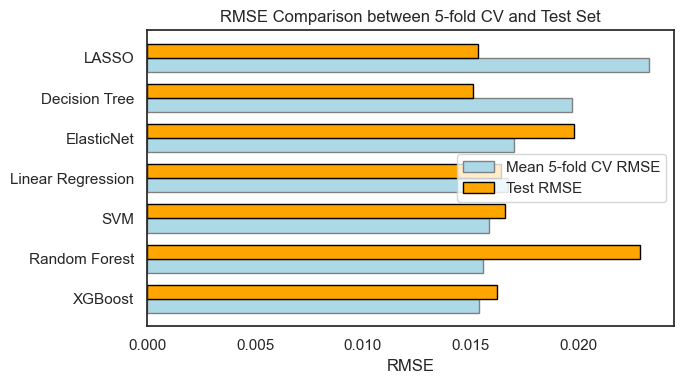

In [212]:
# Set the size of the figure
plt.figure(figsize=(7, 4))

# Plot RMSE from 5-fold CV
cv_rmse = scores_df['Mean 5-fold CV Score (RMSE)']
test_rmse = scores_df['RMSE on test set']
labels = scores_df['Model']

# Define the Y location for the groups
y = np.arange(len(labels))

# Define the width of the bars
height = 0.35

# Plot the bars horizontally
plt.barh(y - height/2, cv_rmse, height, label='Mean 5-fold CV RMSE', color='lightblue', edgecolor='grey')
plt.barh(y + height/2, test_rmse, height, label='Test RMSE', color='orange', edgecolor='black')

# Add some text for labels, title and custom y-axis tick labels, etc.
plt.xlabel('RMSE')
plt.title('RMSE Comparison between 5-fold CV and Test Set')
plt.yticks(y, labels)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()